# Tarea 5 - Jose Adrian Castillo Sierra - 1664207

En esta tarea con el uso de la libreria Pillow se hara una manipulacion de imagenes. Pillow agrega capacidades de procesamiento de imágenes a su intérprete de Python. Esta biblioteca proporciona una amplia compatibilidad con formatos de archivo, una representación interna eficiente y capacidades de procesamiento de imágenes bastante potentes. La biblioteca de imágenes principal está diseñada para un acceso rápido a los datos almacenados en unos pocos formatos de píxeles básicos. Debería proporcionar una base sólida para una herramienta general de procesamiento de imágenes.

Esta libreria nos permite leer y mostrar imagenes de una manera muy sencilla, esto podemos observarlo a continuacion con el siguiente ejemplo:

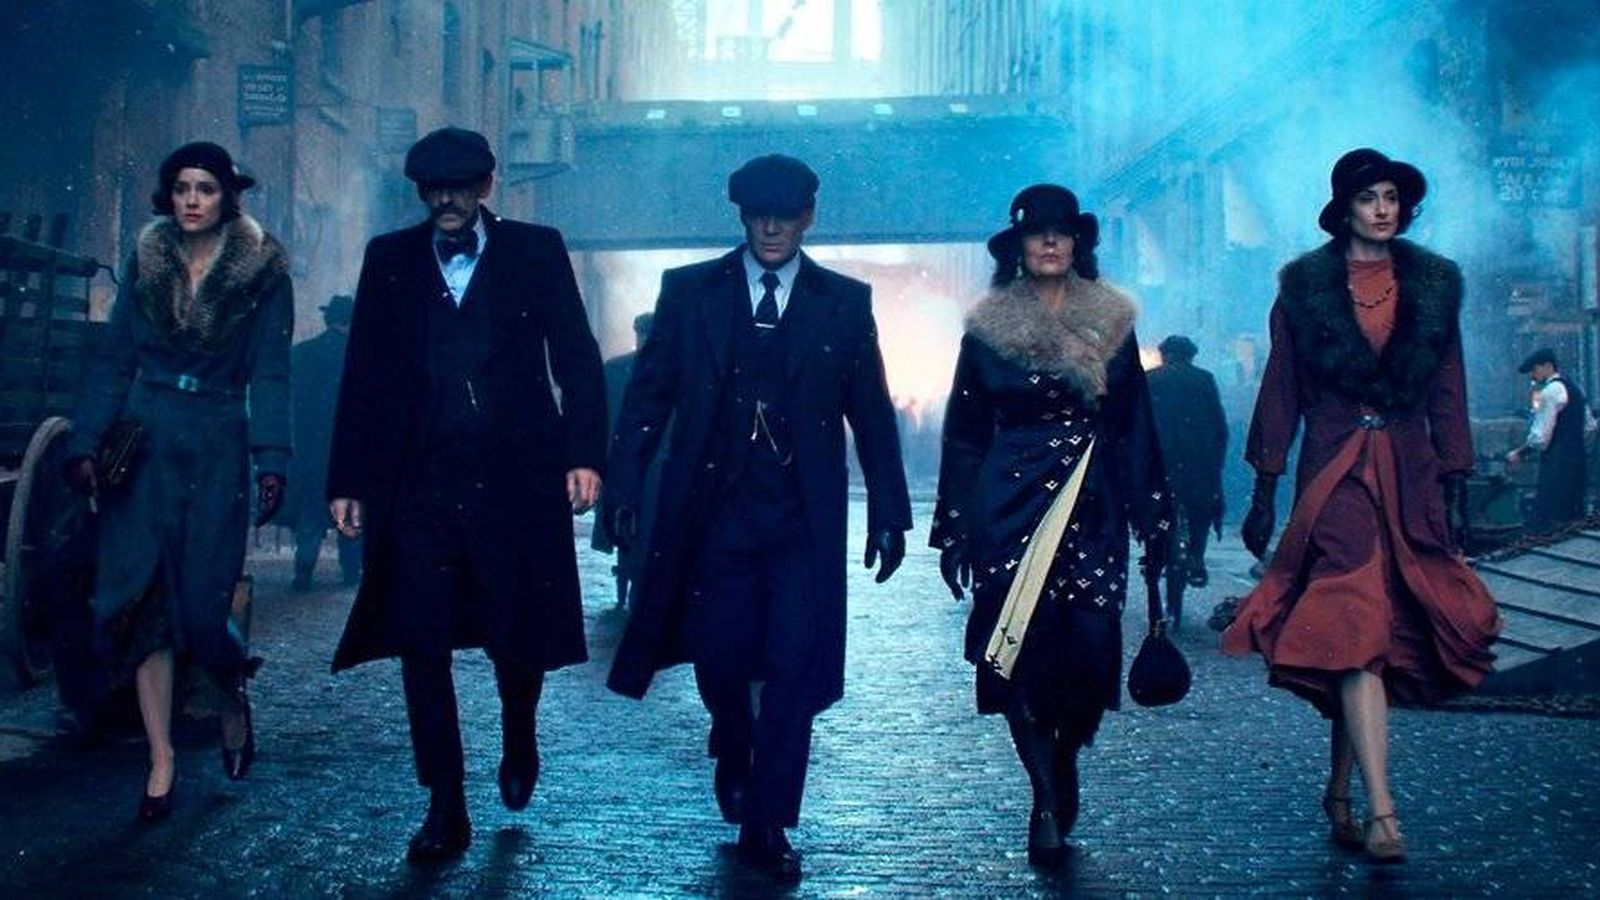

In [23]:
from PIL import Image, ImageFilter

filename = "imagen1.jpg"
with Image.open(filename) as img:
    img.load()
img

Si quisieramos fotomontar una imagen dentro de la imagen anterior podemos hacerlo con Pillow siguiendo una serie de pasos, los cuales son los siguientes:
1. Leer imagen a cortar
2. Cortar imagen al tamaño deseado
3. Separar canales de imagen
4. Erosionar y Dilatar la imagen con el fin de eliminar los pixeles no deseados
5. Crear mascara de imagen
6. Copiar la imagen dentro de la imagen deseada

### 1. Leer
Se corta la imagen a los pixeles deseados utilizando la funcion __crop__

In [24]:
from PIL import Image, ImageFilter

filename = "image3.jpg"
with Image.open(filename) as img3:
    img3.load()

### 2.Cortar Imagen

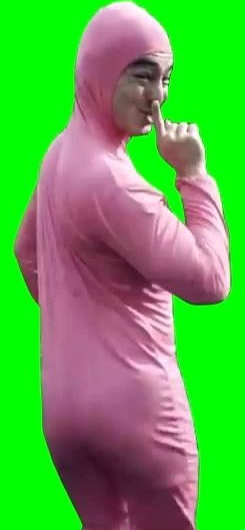

In [25]:
cropped_img_3 = img3.crop((520, 150, 765, 680))
cropped_img_3

### 3. Separar Canales de Imagen
Se separan los canales de imagen, en este caso se usara el canal azul ya que este nos ayuda a excluir el fondo verde que tiene la imagen

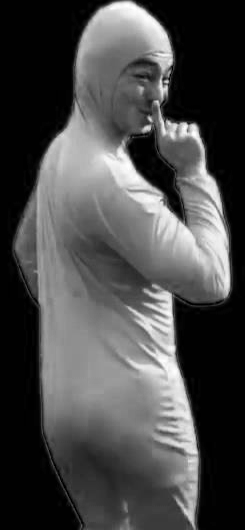

In [26]:
red, green, blue = cropped_img_3.split()
img_gray = img3.convert("L")
blue

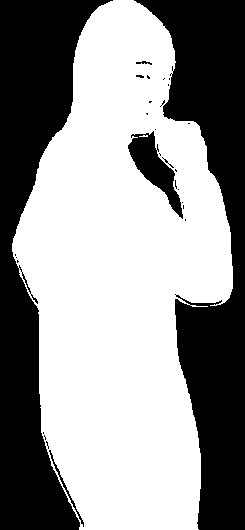

In [27]:
threshold = 30
img_threshold = blue.point(lambda x: 255 if x > threshold  else 0)
img_threshold

### 4. Erosionar y Dilatar

La __erosión__ es el proceso de eliminar los píxeles blancos de los límites de una imagen.


La __dilatación__ es el proceso opuesto a la erosión. Los píxeles blancos se agregan a los límites de una imagen binaria.

In [28]:
from PIL import Image, ImageFilter

def erode(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MinFilter(3))
    return image

def dilate(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MaxFilter(3))
    return image

step_1 = dilate(1, img_threshold)

### 5. Mascara de Imagen

Utilizando la capa creada con anterioridad se utiliza para crear una mascara la cual eliminara los pixeles que no sean blancos. Se aplica posteriormente la mascara creada para ver el resultado de la imagen.

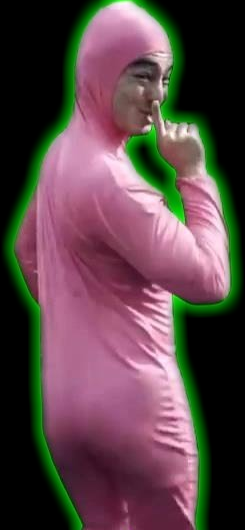

In [29]:
mask = step_1.convert("L")
mask = mask.filter(ImageFilter.BoxBlur(10))
blank = cropped_img_3.point(lambda _: 0)
segmented = Image.composite(cropped_img_3, blank, mask)
segmented

### 6. Copiar la imagen dentro de la deseada
Se aplica la imagen cortada dentro de la imagen deseada

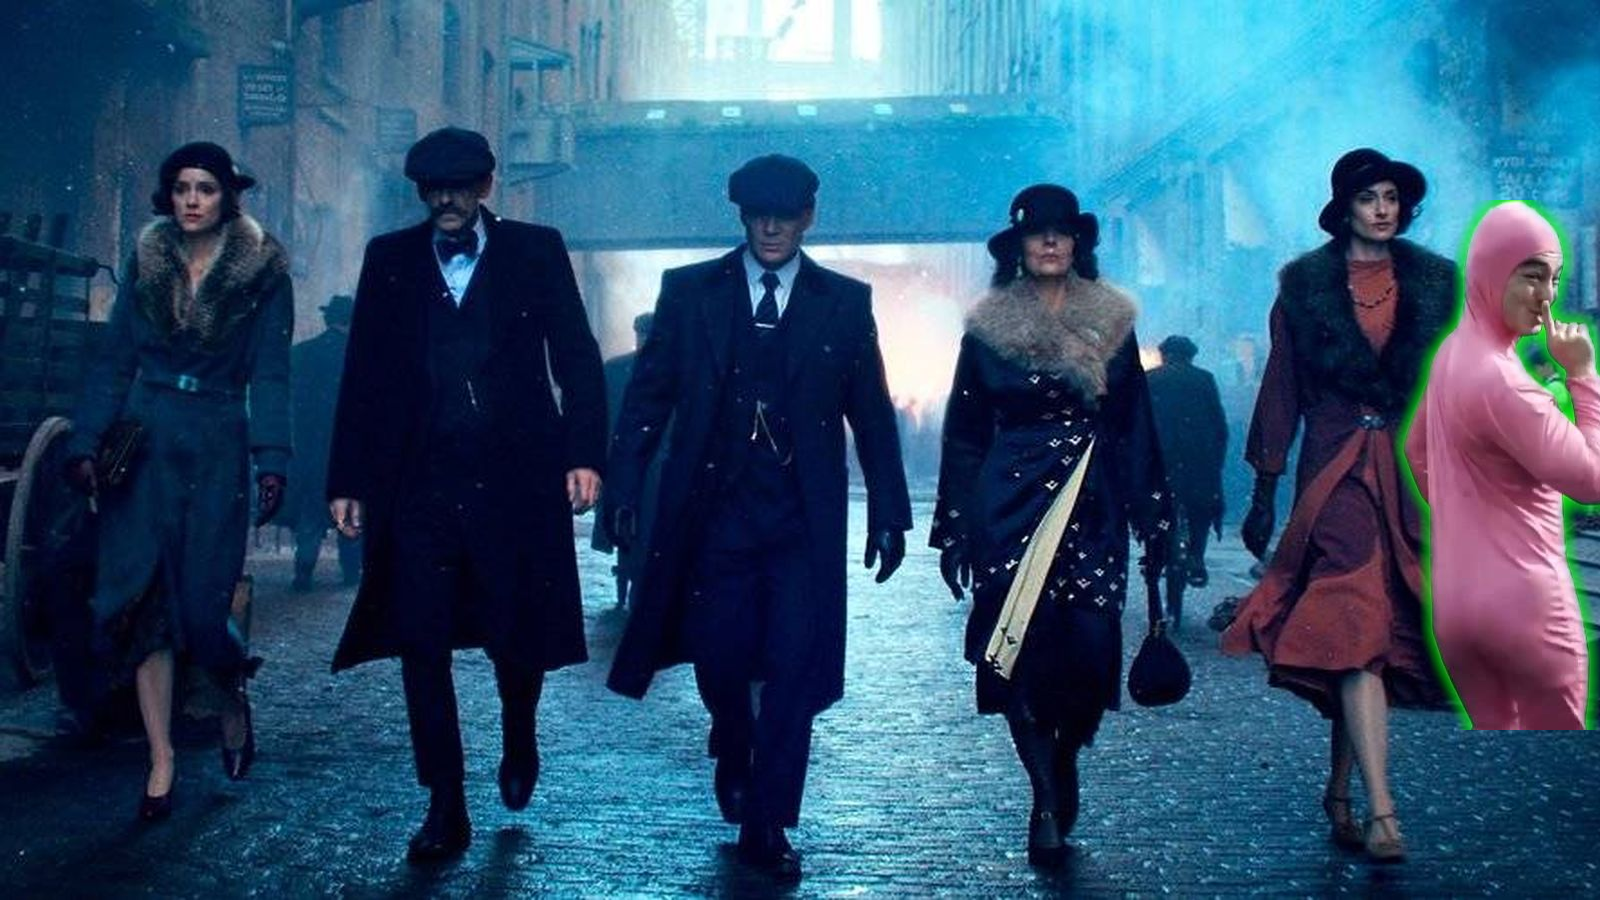

In [31]:
from PIL import Image, ImageFilter

filename = "imagen1.jpg"
with Image.open(filename) as img:
    img.load()
img

img.paste(
    cropped_img_3,(1390, 200), mask
)

img

Se convierte la imagen a escala de grises con el fin de ver si tiene un mejor efecto

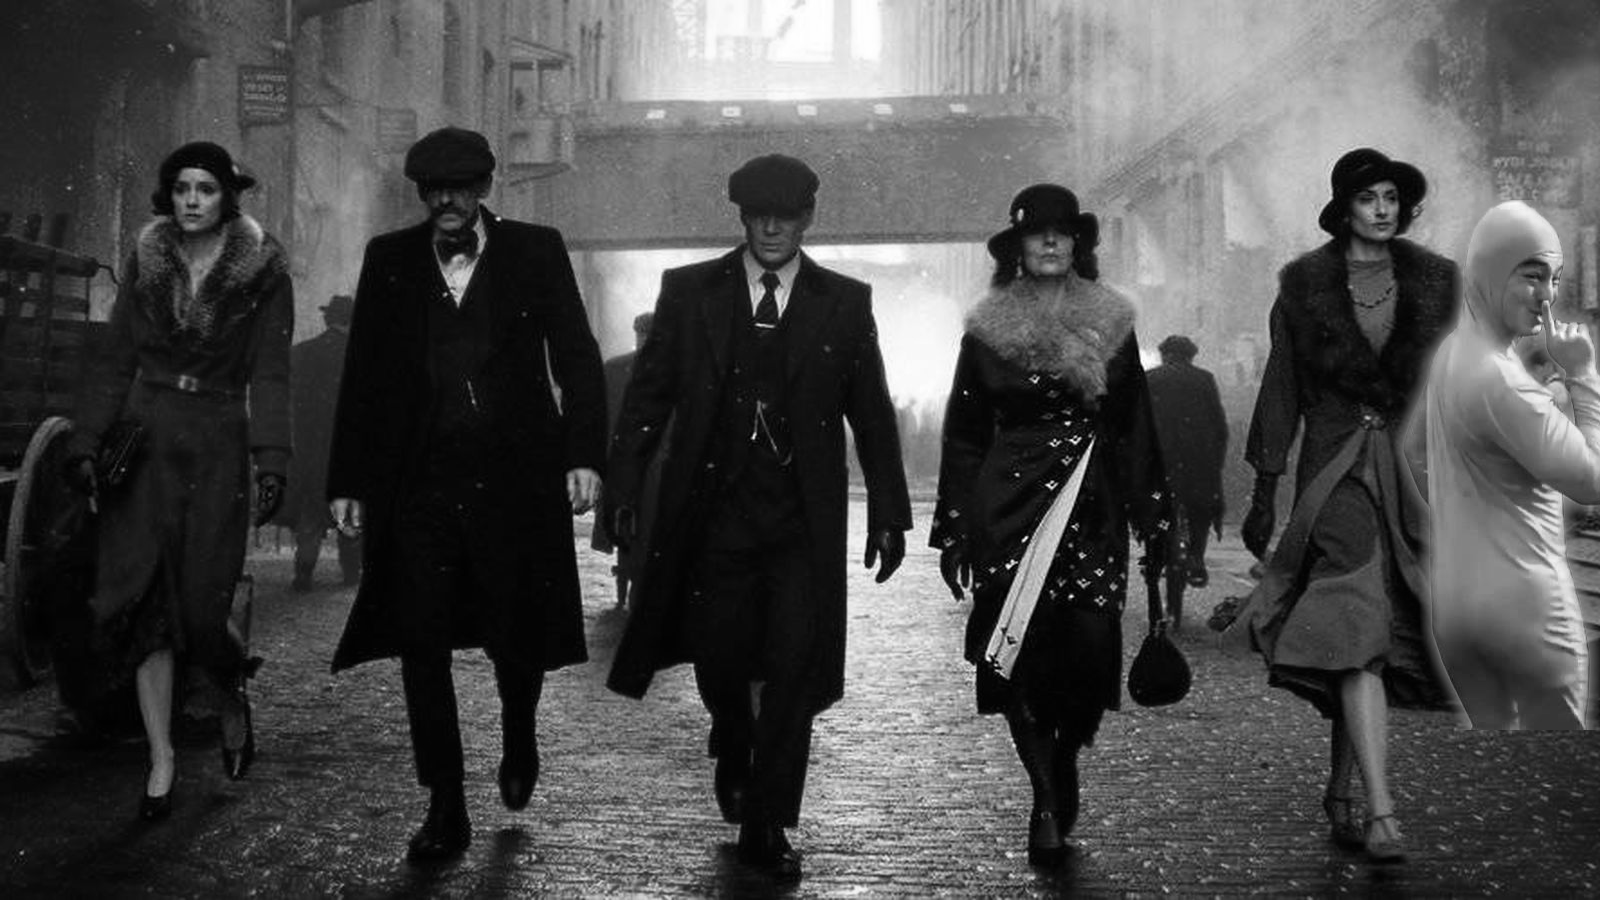

In [32]:
img.convert("L")

## Conclusiones

Para la realizacion de esta tarea se decidio utilizar una imagen con un fondo verde en base a experiencia previa en proyectos de licenciatura. Con anterioridad habia realizado un proyecto de deteccion de rostros utilizando ___OpenCV___, en base a la experiencia recabada con anterioridad una imagen con un fondo con colores croma o con una iluminacion muy buena es mas adecuada para realizar las mascaras de recorte.

El uso de Pillow fue una experiencia muy interesante ya que se pueden apreciar muchos conceptos que utilizan programas como Photoshop para la edicion de imagenes.